In [1]:
import torch
from torch import nn
import d2l.torch as d2l

In [2]:
# 画一条正弦曲线
T = 1000
x = torch.arange(1, T + 1, dtype=torch.float32)
y = torch.sin(x * 0.01) + torch.normal(0, 0.1, (T, ))

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


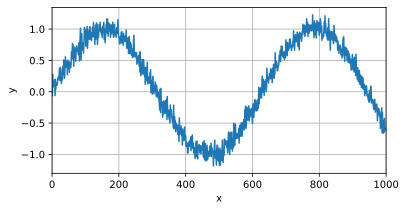

In [3]:
d2l.plot(x, [y], xlabel="x", ylabel="y", xlim=[0, 1000], figsize=(6, 3))

In [4]:
tau = 4
features = torch.zeros((T - tau, tau))
for i in range(tau):
    features[:, i] = y[i: T - tau + i] # 0-996, 1-997, 2-998, 3-999
labels = y[tau:].reshape((-1, 1)) # 原来这里弄错了

In [5]:
batch_size, n_train = 16, 600

In [6]:
train_iter = d2l.load_array((features[: n_train], labels[: n_train]), batch_size, is_train=True)

In [7]:
def init_weights(m):
    if type == nn.Linear:
        nn.init.xavier_uniform_(m.weight)
    
def get_net(): # 4 * 10 10 * 1
    net = nn.Sequential(nn.Linear(4, 10),
                        nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

In [8]:
def train(epochs, train_iter, net, loss, lr):
    trainer = torch.optim.Adam(net.parameters(), lr)
    for epoch in range(epochs):
        for x, y in train_iter:
            trainer.zero_grad()
            l = loss(net(x), y)
            l.sum().backward()
            trainer.step()
        print(f'epoch{epoch+1},'f'loss:{d2l.evaluate_loss(net, train_iter, loss):f}')

In [33]:
net = get_net()
loss = nn.MSELoss(reduction='none')
train(20, train_iter, net, loss, 0.01)

epoch1,loss:0.015091
epoch2,loss:0.013939
epoch3,loss:0.013644
epoch4,loss:0.013439
epoch5,loss:0.013746
epoch6,loss:0.013426
epoch7,loss:0.013154
epoch8,loss:0.013748
epoch9,loss:0.013155
epoch10,loss:0.013245
epoch11,loss:0.014225
epoch12,loss:0.013791
epoch13,loss:0.014841
epoch14,loss:0.013169
epoch15,loss:0.012719
epoch16,loss:0.013742
epoch17,loss:0.013393
epoch18,loss:0.013003
epoch19,loss:0.013680
epoch20,loss:0.013436


/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


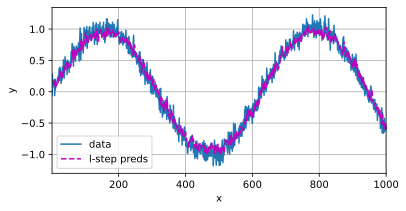

In [13]:
onestep_preds = net(features)
d2l.plot([x, x[tau:]], 
         [y.detach().numpy(), onestep_preds.detach().numpy()],
          'x', 'y', 
          legend=['data', 'l-step preds'], xlim=[1, 1000],
          figsize=(6, 3))

In [16]:
torch.zeros?

Docstring:
zeros(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor

Returns a tensor filled with the scalar value `0`, with the shape defined
by the variable argument :attr:`size`.

Args:
    size (int...): a sequence of integers defining the shape of the output tensor.
        Can be a variable number of arguments or a collection like a list or tuple.

Keyword args:
    out (Tensor, optional): the output tensor.
    dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
        Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
    layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
        Default: ``torch.strided``.
    device (:class:`torch.device`, optional): the desired device of returned tensor.
        Default: if ``None``, uses the current device for the default tensor type
        (see :func:`torch.set_default_tensor_type`). :attr:`devi

In [34]:
multistep_preds = torch.zeros(T) # 其实这里值生成剩余部分即可
multistep_preds[: n_train + tau] = y[: n_train + tau]
for i in range(n_train + tau, T):
    multistep_preds[i] = net(multistep_preds[i - tau: i]) # 添加reshape((1, -1)

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


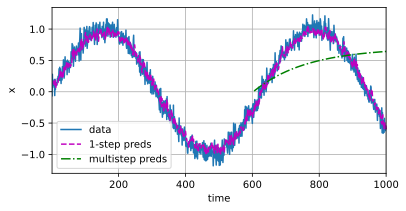

In [35]:
d2l.plot([x, x[tau:], x[n_train+tau:]],
         [y.detach().numpy(), 
          onestep_preds.detach().numpy(),
          multistep_pred[n_train+tau:].detach().numpy()],
         'time','x', legend=['data','1-step preds','multistep preds'],
         xlim=[1,1000], figsize=(6,3))

In [36]:
max_steps = 64

In [37]:
import collections
import re

In [38]:
d2l.DATA_HUB['time_machine'] = (d2l.DATA_URL + 'timemachine.txt', 
                                '090b5e7e70c295757f55df93cb0a180b9691891a')
def read_time_machine():
    with open(d2l.download('time_machine'), 'r') as f:
        lines = f.readlines()
    return [re.sub('[^A-Za-z]+', ' ', line).strip().lower() for line in lines]


In [40]:
lines = read_time_machine() # 一维list
print(f'#文本总行数：{len(lines)}')
print(lines[10])

#文本总行数：3221
twinkled and his usually pale face was flushed and animated the


In [99]:
# tmp = read_time_machine()
# tmp_tokens = d2l.tokenize(tmp)
# tmp_corpus = [token for line in tmp_tokens for token in line]
# tmp_corpus


[['the', 'time', 'machine', 'by', 'h', 'g', 'wells'],
 [],
 [],
 [],
 [],
 ['i'],
 [],
 [],
 ['the',
  'time',
  'traveller',
  'for',
  'so',
  'it',
  'will',
  'be',
  'convenient',
  'to',
  'speak',
  'of',
  'him'],
 ['was',
  'expounding',
  'a',
  'recondite',
  'matter',
  'to',
  'us',
  'his',
  'grey',
  'eyes',
  'shone',
  'and'],
 ['twinkled',
  'and',
  'his',
  'usually',
  'pale',
  'face',
  'was',
  'flushed',
  'and',
  'animated',
  'the'],
 ['fire',
  'burned',
  'brightly',
  'and',
  'the',
  'soft',
  'radiance',
  'of',
  'the',
  'incandescent'],
 ['lights',
  'in',
  'the',
  'lilies',
  'of',
  'silver',
  'caught',
  'the',
  'bubbles',
  'that',
  'flashed',
  'and'],
 ['passed',
  'in',
  'our',
  'glasses',
  'our',
  'chairs',
  'being',
  'his',
  'patents',
  'embraced',
  'and'],
 ['caressed',
  'us',
  'rather',
  'than',
  'submitted',
  'to',
  'be',
  'sat',
  'upon',
  'and',
  'there',
  'was',
  'that'],
 ['luxurious',
  'after',
  'dinner',

In [49]:
# 将每个单词分开
def tokenize(lines, token='word'):
    if token == 'word':
        tokens = [line.split() for line in lines] # 可以直接split 字符串遍历
    if token == 'char':
        tokens = [list(line) for line in lines]
    return tokens

In [61]:
tokens = tokenize(lines, token='word') # 二维列表
tokens[0]

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']

In [59]:
# 建立词表
class Vocab:
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens is None:
            tokens = []
        if reserved_tokens is None: # is 判断是否同一个地址 == 判断值是否相等
            reserved_tokens = []
            
        counter = count_corps(tokens)
        self._token_freqs = sorted(counter.items(), key = lambda x: x[1], reverse=True)
        
        # 未知词元索引
        self.idx_to_token = ['<unk>'] + reserved_tokens # 已经保存的值
        self.token_to_idx = {token: idx
                                for idx, token in enumerate(self.idx_to_token)}
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break # 结束这次循环？ 这已经排过序了
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) - 1
    def __len__(self):
        return len(self.idx_to_token)
    
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem__(token) for token in tokens]
        
    def to_tokens(self, indices):
        if not isinstandce(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]
    
    @property
    def unk(self):
        return 0
    @property
    def token_freqs(self): # 设置为属性方法
        return self._token_freqs


def count_corps(tokens):
    if len(tokens) == 0 or isinstance(tokens[0], list):
        tokens = [token for line in tokens for token in line]
    return collections.Counter(tokens)


In [62]:
vocab=Vocab(tokens)
print(list(vocab.token_to_idx.items())[:10])

[('<unk>', 0), ('the', 1), ('i', 2), ('and', 3), ('of', 4), ('a', 5), ('to', 6), ('was', 7), ('in', 8), ('that', 9)]


In [66]:
def load_corpus_time_machine(max_tokens=-1): #@save
    """返回时光机器数据集的词元索引列表和词表"""
    lines = read_time_machine() # 返回以句子为元素的列表
    tokens = tokenize(lines,'char') # 再一次拆分
    vocab = Vocab(tokens) # 
    #因为时光机器数据集中的每个文本行不一定是一个句子或一个段落，
    #所以将所有文本行展平到一个列表中
    corpus = [vocab[token] for line in tokens for token in line] # 建立的是一个一维列表
    if max_tokens > 0:
        corpus=corpus[:max_tokens]
    return corpus, vocab
corpus, vocab=load_corpus_time_machine()
len(corpus),len(vocab)

(170580, 28)

In [69]:
tokens = d2l.tokenize(d2l.read_time_machine()) # 二维列表（句子变单词） 并没有运行上面load_corpus_time_machine方法
corpus = [token for line in tokens for token in line]
corpus

['the',
 'time',
 'machine',
 'by',
 'h',
 'g',
 'wells',
 'i',
 'the',
 'time',
 'traveller',
 'for',
 'so',
 'it',
 'will',
 'be',
 'convenient',
 'to',
 'speak',
 'of',
 'him',
 'was',
 'expounding',
 'a',
 'recondite',
 'matter',
 'to',
 'us',
 'his',
 'grey',
 'eyes',
 'shone',
 'and',
 'twinkled',
 'and',
 'his',
 'usually',
 'pale',
 'face',
 'was',
 'flushed',
 'and',
 'animated',
 'the',
 'fire',
 'burned',
 'brightly',
 'and',
 'the',
 'soft',
 'radiance',
 'of',
 'the',
 'incandescent',
 'lights',
 'in',
 'the',
 'lilies',
 'of',
 'silver',
 'caught',
 'the',
 'bubbles',
 'that',
 'flashed',
 'and',
 'passed',
 'in',
 'our',
 'glasses',
 'our',
 'chairs',
 'being',
 'his',
 'patents',
 'embraced',
 'and',
 'caressed',
 'us',
 'rather',
 'than',
 'submitted',
 'to',
 'be',
 'sat',
 'upon',
 'and',
 'there',
 'was',
 'that',
 'luxurious',
 'after',
 'dinner',
 'atmosphere',
 'when',
 'thought',
 'roams',
 'gracefully',
 'free',
 'of',
 'the',
 'trammels',
 'of',
 'precision',


In [70]:
vocab = d2l.Vocab(corpus)
vocab.token_freqs[:10] # 属性方法

[('the', 2261),
 ('i', 1267),
 ('and', 1245),
 ('of', 1155),
 ('a', 816),
 ('to', 695),
 ('was', 552),
 ('in', 541),
 ('that', 443),
 ('my', 440)]

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


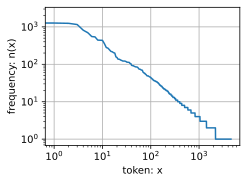

In [72]:
freqs=[freq for token, freq in vocab.token_freqs]
d2l.plot(freqs, xlabel='token: x', ylabel='frequency: n(x)',xscale='log', yscale='log')

In [74]:
bigram_tokens=[pair for pair in zip(corpus[:-1], corpus[1:])]
bigram_vocab=d2l.Vocab(bigram_tokens)
bigram_vocab.token_freqs[:10]

[(('of', 'the'), 309),
 (('in', 'the'), 169),
 (('i', 'had'), 130),
 (('i', 'was'), 112),
 (('and', 'the'), 109),
 (('the', 'time'), 102),
 (('it', 'was'), 99),
 (('to', 'the'), 85),
 (('as', 'i'), 78),
 (('of', 'a'), 73)]

In [76]:
trigram_tokens=[triple for triple in zip(corpus[:-2], corpus[1:-1], corpus[2:])]
trigram_vocab=d2l.Vocab(trigram_tokens)
trigram_vocab.token_freqs[:10]

[(('the', 'time', 'traveller'), 59),
 (('the', 'time', 'machine'), 30),
 (('the', 'medical', 'man'), 24),
 (('it', 'seemed', 'to'), 16),
 (('it', 'was', 'a'), 15),
 (('here', 'and', 'there'), 15),
 (('seemed', 'to', 'me'), 14),
 (('i', 'did', 'not'), 14),
 (('i', 'saw', 'the'), 13),
 (('i', 'began', 'to'), 13)]

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


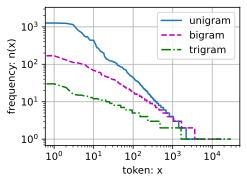

In [78]:
bigram_freqs=[freq for token, freq in bigram_vocab.token_freqs]
trigram_freqs=[freq for token, freq in trigram_vocab.token_freqs]
d2l.plot([freqs, bigram_freqs, trigram_freqs], xlabel='token: x',ylabel='frequency: n(x)', xscale='log', yscale='log',legend=['unigram','bigram','trigram'])

# 随机抽样
## 对词表序列开始随机划分
### 一维列表

In [81]:
my_seq = range(35)
type(my_seq)

range

In [82]:
def seq_data_iter_random(corpus, batch_size, num_steps):
    
    corpus = corpus[random.randint(0, num_steps - 1): ] # 传入列表
    num_subseqs = (len(corpus) - 1) // num_steps # 可以划分子序列个数
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps)) # 起初位置
    random.shuffle(initial_indices) # 打乱
    
    def data(pos):
        return corpus[pos: pos + num_steps]
        
    num_batches = num_subseqs // batch_size
    
    for i in range(0, batch_size * num_batches, batch_size): # 给这几个epoch
        initial_indices_per_batch = initial_indices[i: i + batch_size] # 从1开始的列表 i是随机的
        X = [data(j) for j in initial_indices_per_batch]
        Y = [data(j + 1) for j in initial_indices_per_batch]
        yield torch.tensor(X), torch.tensor(Y) # 记录了一段序列索引

- 顺序分裂 每个批次指定序列

In [ ]:
def seq_data_sequential(corpus, batch_size, num_steps):
    num_subseqs = (len(corpus) - 1) // num_steps # 子序列个数
    initial_indices = list(range(0, num_subseqs * num_steps, num_steps))
    

- 简洁实现

In [84]:
import torch
from torch import nn
from torch.nn import functional as F
from d2l import torch as d2l

In [85]:
batch_size, num_steps = 32, 35
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)

In [86]:
num_hiddens = 256
rnn_layer = nn.RNN(len(vocab), num_hiddens)

In [87]:
state = torch.zeros((1, batch_size, num_hiddens)) # 隐状态
state.shape

torch.Size([1, 32, 256])

In [88]:
X = torch.rand(size=(num_steps, batch_size, len(vocab)))
Y, state_new = rnn_layer(X, state) # X是输入的现有词 (时间步数量， 批量大小， 词表大小）num_steps * batch_size * (num)
Y.shape, state_new.shape

(torch.Size([35, 32, 256]), torch.Size([1, 32, 256]))

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, rnn_layer, vocab_size, **kwargs):
        super(RNNModel, self).__init__(**kwargs)
        self.rnn = rnn_layer
        self.vocab_size = vocab_size
        self.num_hiddens = self.rnn.hidden_size
        if not self.rnn.bidrectional:
            self.num_directions = 1
            self.linear = nn.Linear(self.num_hiddens, self.vocab_size)
        else:
            self.num_directions = 2
            self.linear = nn.Linear(self.num_hiddens * 2, self.vocab_size)
    def foward(self, input, state):
        X = F.one_hot(input.T.long(), self.vocab_size)
        X = X.to(torch.float32)
        Y, state = self.rnn(X, state)
        output = self.linear(Y.reshape((-1, Y.shape[-1]))
        return output, state
    def begin_state(self, device, batch_size=1):
        if not isinstance(self.rnn, nn.LSTM):
            return torch.zeros((self.num_directions * self.rnn.num_layers,
                                batch_size, self.num_hiddens),
                               device=device)